In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 25})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(os.path.join(dirin, files[0]), comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(os.path.join(dirin, file), comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df


In [5]:
dirin = os.path.join("..", "..", "Data", "MuonsROI")
filepref = "roi_RndSeed123456789_part1_part*"

df = load_dataframe_from_files(dirin, filepref)

IndexError: list index out of range

In [4]:
op_yield = 40    # 40 OP / KeV
df["pedetected"] = np.ceil(df.energydeposition * op_yield * df.detectionefficiency)    # round to next int
df["energydetected"] = df.pedetected / op_yield

In [5]:
dfsmall = df[(df.x>=-500) & (df.x<=500)]
dfsmall = dfsmall[(dfsmall.y>=-500) & (dfsmall.y<=500)]
dfsmall = dfsmall[(dfsmall.z>=-1000) & (dfsmall.z<=1000)]
# Consider small roi: x,y +-500, z +-1000
edep_gbyevent_smallROI = dfsmall.groupby("eventnumber").energydeposition.sum()
edep_gbyevent_stats_smallROI = edep_gbyevent_smallROI.describe()
# Consider roi as optical map: x,y +-700, z+-845
edep_gbyevent = df.groupby("eventnumber").energydeposition.sum()
edep_gbyevent_stats = edep_gbyevent.describe()

print(edep_gbyevent_stats.loc['count'])
print(edep_gbyevent_stats_smallROI.loc['count'])

20751.0
14645.0


20751.0
14645.0


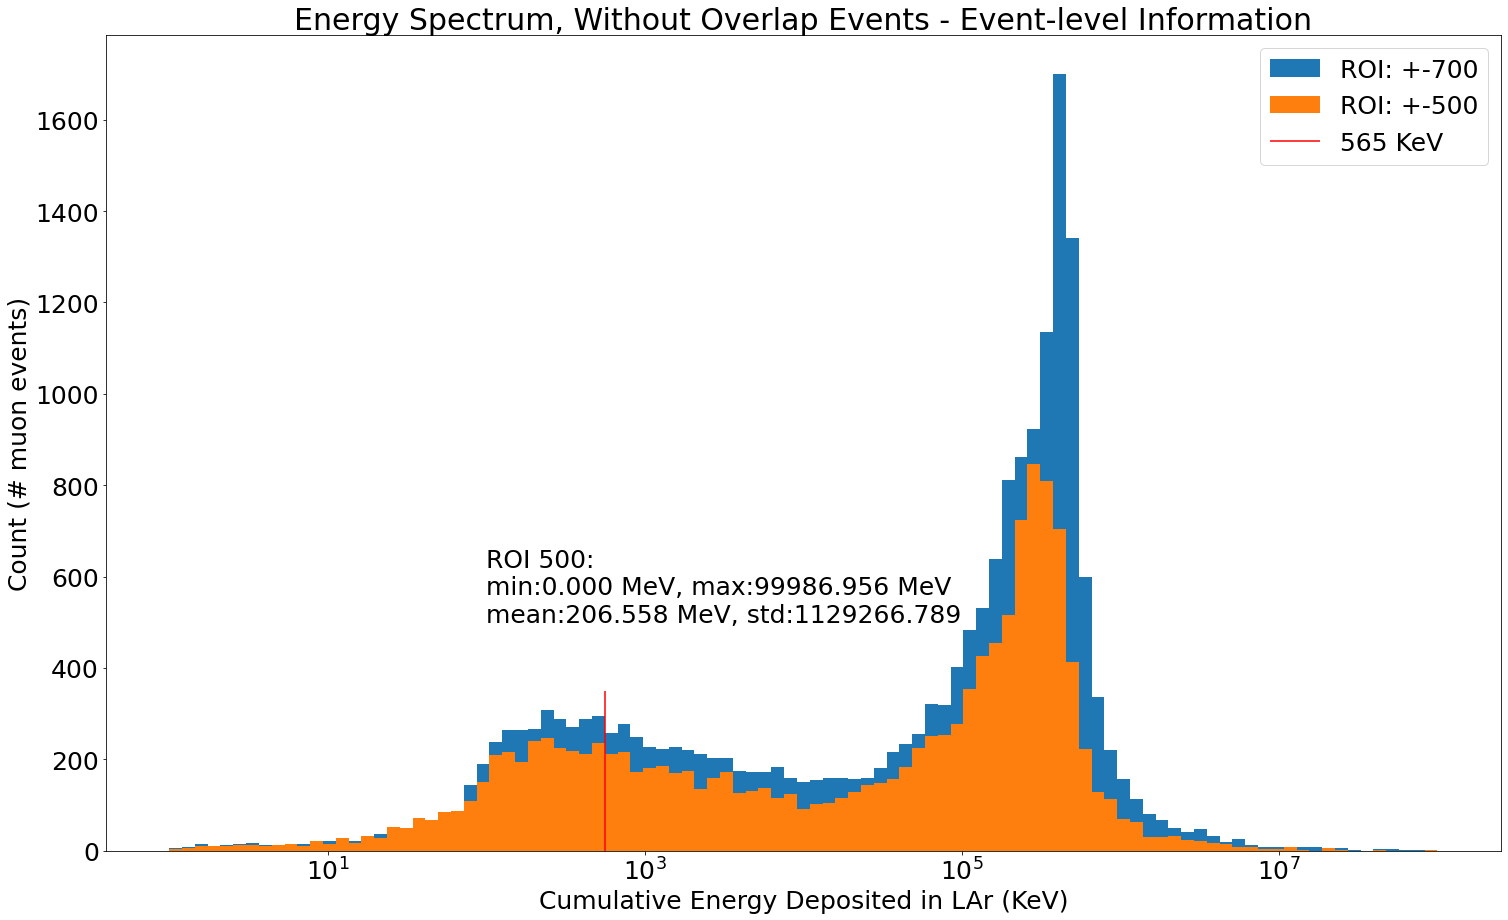

In [14]:
print(edep_gbyevent_stats.loc['count'])
print(edep_gbyevent_stats_smallROI.loc['count'])

bins = np.logspace(0, 8, 100)
plt.hist(edep_gbyevent, bins=bins, label="ROI: +-700")
plt.hist(edep_gbyevent_smallROI, bins=bins, label="ROI: +-500", density=False)
plt.xlabel("Cumulative Energy Deposited in LAr (KeV)")
plt.ylabel("Count (# muon events)")
#plt.text(100, 1200, "ROI 700:\nmin:{:.3f} MeV, max:{:.3f} MeV\nmean:{:.3f} MeV, std:{:.3f}".format(edep_gbyevent_stats.loc['min']/1000, edep_gbyevent_stats.loc['max']/1000, 
#                                                                                                 edep_gbyevent_stats.loc['mean']/1000, edep_gbyevent_stats.loc['std']))
plt.text(100, 500, "ROI 500:\nmin:{:.3f} MeV, max:{:.3f} MeV\nmean:{:.3f} MeV, std:{:.3f}".format(edep_gbyevent_stats_smallROI.loc['min']/1000, edep_gbyevent_stats_smallROI.loc['max']/1000, 
                                                                                                 edep_gbyevent_stats_smallROI.loc['mean']/1000, edep_gbyevent_stats_smallROI.loc['std']))
plt.xscale('log')
plt.title("Energy Spectrum, Without Overlap Events - Event-level Information")
plt.vlines(x=565, ymin=0, ymax=350, label="565 KeV", color='r')
plt.legend()
plt.show()

In [15]:
dirin = os.path.join("..", "..", "Development", "Out")
prefix_7Ar39_files = "Ar39_Snapshots_T100_DT4_Grp7_Seed123456789_Part1.csv"
df7 = load_dataframe_from_files(dirin, prefix_7Ar39_files)

[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp7_Seed123456789_Part1.csv


In [16]:
dfnonzero = df[df.pedetected>0]
pedet_gbyevent_nonzero = dfnonzero.groupby("eventnumber").pedetected.sum()
pedet_gbyevent_nonzero_stats = pedet_gbyevent_nonzero.describe()
# ar39 7 pileup
pedet_gbyevent_ar39 = df7.groupby("eventnumber").pedetected.sum()
pedet_gbyevent_ar39_stats = pedet_gbyevent_ar39.describe()
print("Muon Population Size: {}".format(pedet_gbyevent_nonzero_stats.loc['count']))
print("7Ar39 Population Size: {}".format(pedet_gbyevent_ar39_stats.loc['count']))

Muon Population Size: 16274.0
7Ar39 Population Size: 98852.0


In [17]:
pedet_gbyevent_smallROI = dfsmall.groupby("eventnumber").pedetected.sum()
pedet_gbyevent_smallROI_stats = pedet_gbyevent_smallROI.describe()

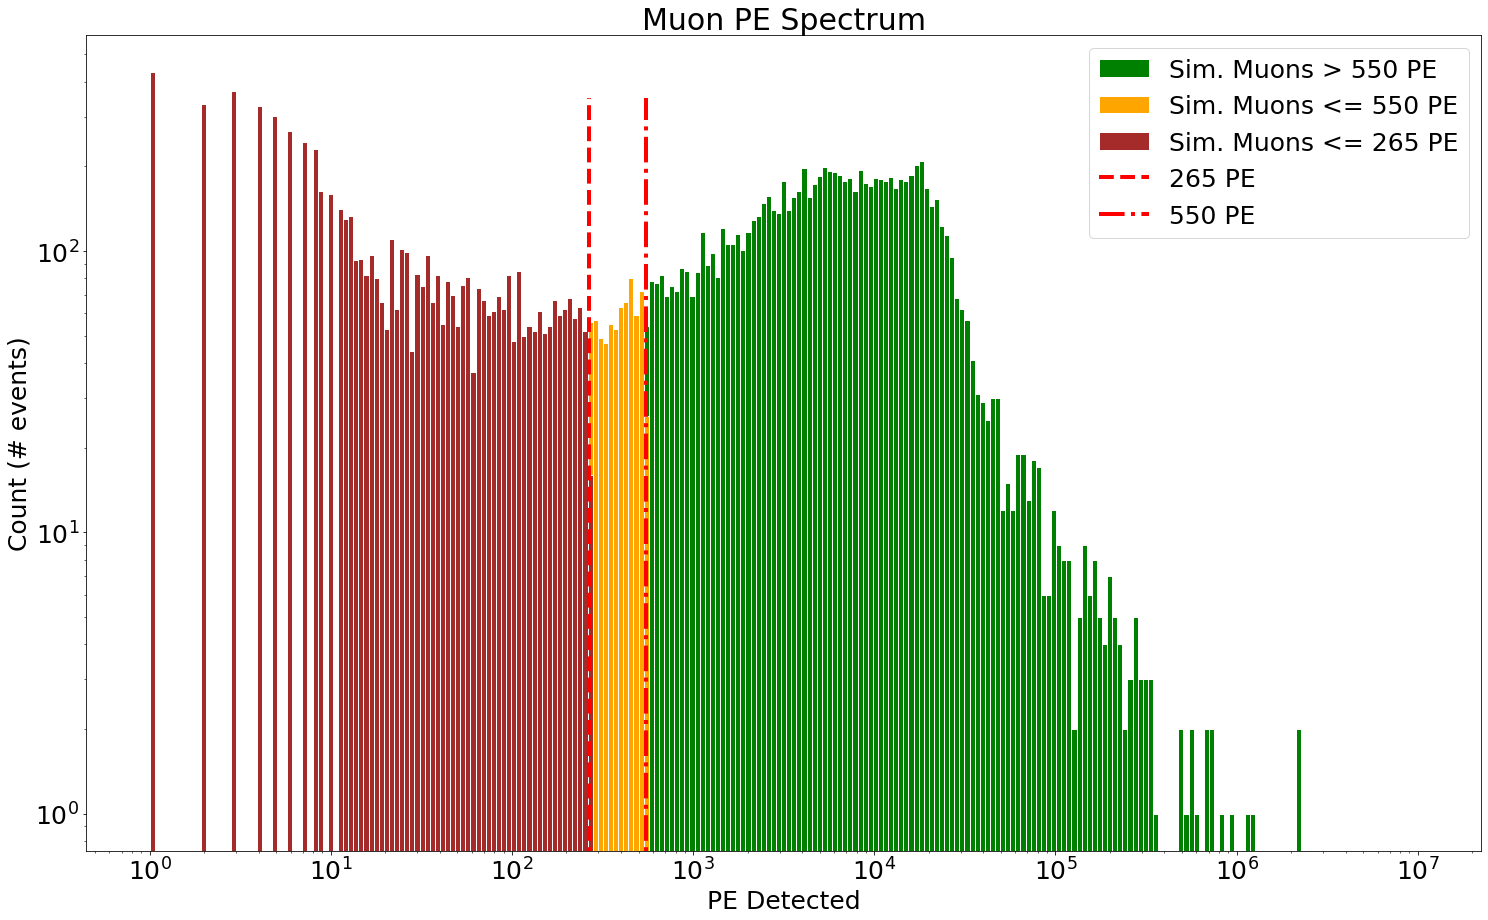

In [48]:
alpha=1
bins = np.logspace(0, 7, 250)
plt.title("Muon PE Spectrum")
plt.xlabel("PE Detected")
plt.ylabel("Count (# events)")
#plt.vlines(x=18, ymin=0, ymax=1, label="18 PE", color='r', linestyles='dashed', linewidth=3)
#plt.vlines(x=80, ymin=0, ymax=1, label="80 PE", color='r', linestyles='dashdot', linewidth=3)
plt.vlines(x=265, ymin=0, ymax=350, label="265 PE", color='r', linestyles='dashed', linewidth=4)
plt.vlines(x=550, ymin=0, ymax=350, label="550 PE", color='r', linestyles='dashdot', linewidth=4)

plt.hist(pedet_gbyevent_nonzero, bins=bins, density=False, label="Sim. Muons > 550 PE", alpha=alpha, edgecolor='w', color='g')
plt.hist(pedet_gbyevent_nonzero[pedet_gbyevent_nonzero<=550], bins=bins, density=False, label="Sim. Muons <= 550 PE", alpha=alpha, edgecolor='w', color='orange')
plt.hist(pedet_gbyevent_nonzero[pedet_gbyevent_nonzero<=265], bins=bins, density=False, label="Sim. Muons <= 265 PE", alpha=alpha, edgecolor='w', color='brown')
#plt.hist(pedet_gbyevent_ar39, bins=bins, density=True, label="Sim. 7-Ar39 Pileups", alpha=alpha, edgecolor='w', color='#e377c2')

plt.yscale('log')
plt.xscale('log')
#plt.text(700, 0.01, "Simulated 7Ar39 Pileups: up to 265 PE detected\n\n" \
#                    "Corner Case: 7Ar39 of max energy deposit ~4MeV.\n" \
#                    "Considering Yield=40, max Det.Efficiency=0.0035,\n" \
#                    "we expect ~550 PE detected. Above this bound, no Ar39!")
#plt.text(700, 0.001, "Note: 43.7% of simulated muons have <550 PE detected.\n" \
#                     "We can easily classify them.")
plt.legend(loc='upper right')
plt.show()


In [50]:
print("Number of Muons: {}".format(len(pedet_gbyevent_nonzero)))
print("Number of Marginal Muons: {}".format(len(pedet_gbyevent_nonzero[pedet_gbyevent_nonzero<=265])))
print("Percent Marginal Muons: {:.5f}".format(len(pedet_gbyevent_nonzero[pedet_gbyevent_nonzero<=265])/len(pedet_gbyevent_nonzero)))

Number of Muons: 16274
Number of Marginal Muons: 6445
Percent Marginal Muons: 0.39603


In [157]:
pedet_gbyevent_nonzero.describe()

count    1.560200e+04
mean     7.660106e+03
std      3.640062e+04
min      1.000000e+00
25%      2.900000e+01
50%      1.488500e+03
75%      7.650000e+03
max      2.169989e+06
Name: pedetected, dtype: float64

In [115]:
df7.groupby("eventnumber").pedetected.sum().describe()

count    98852.000000
mean        79.812356
std         27.343135
min         18.000000
25%         60.000000
50%         76.000000
75%         96.000000
max        265.000000
Name: pedetected, dtype: float64

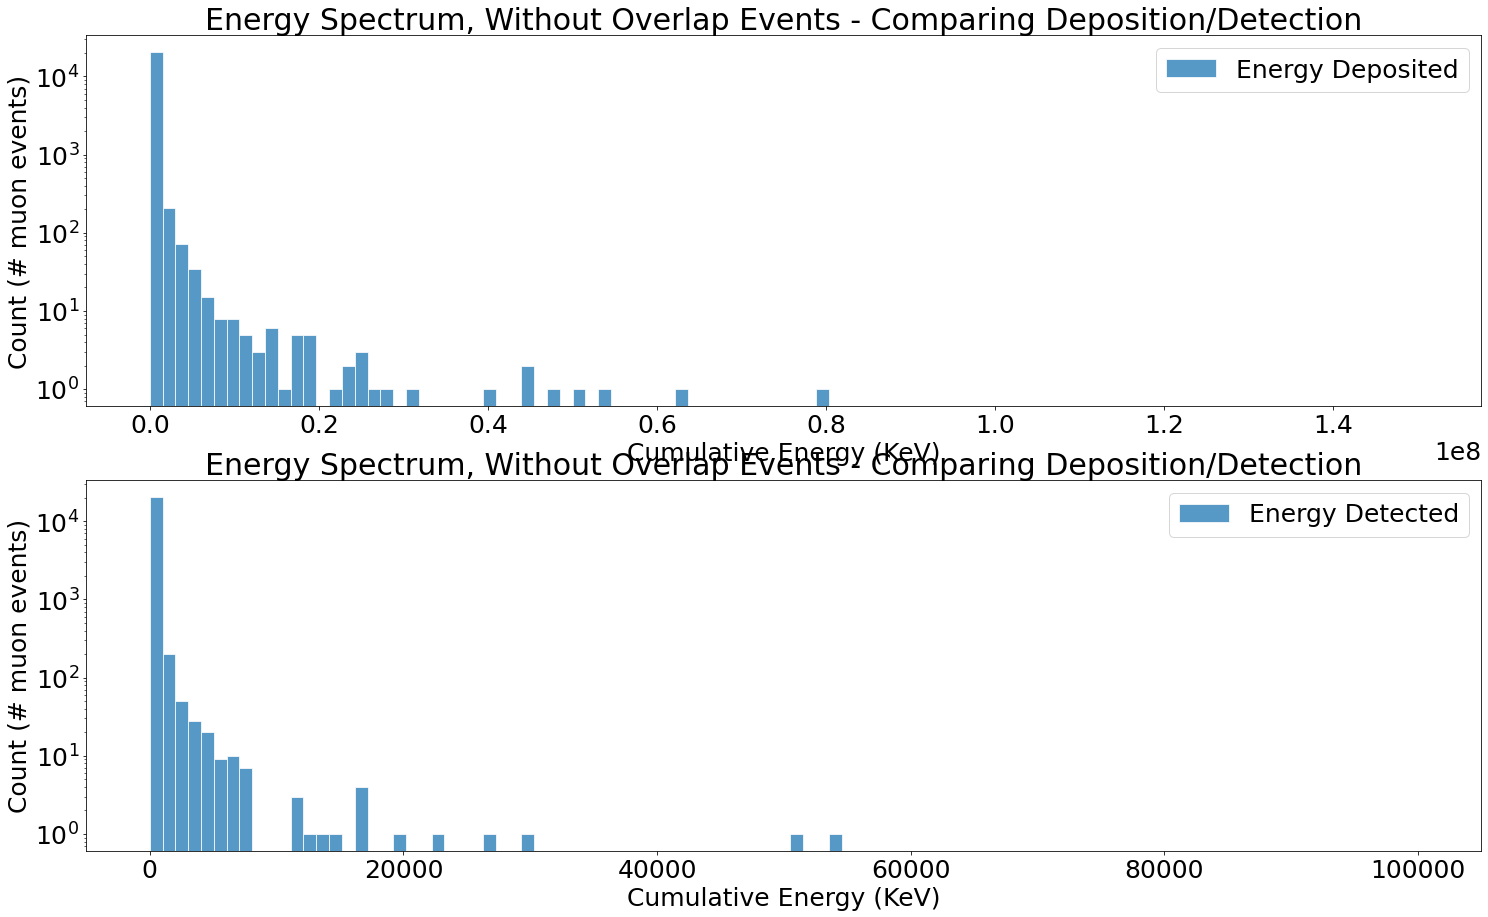

In [8]:
# Comparison Energy deposited, Energy detected
alpha = 0.75
plt.subplot(2, 1, 1)
bins = np.linspace(0, 1.5*10**8, 100)
plt.hist(df.groupby("eventnumber").energydeposition.sum(), bins=bins, label="Energy Deposited", alpha=alpha, edgecolor='w')
plt.xlabel("Cumulative Energy (KeV)")
plt.ylabel("Count (# muon events)")
plt.yscale('log')
plt.title("Energy Spectrum, Without Overlap Events - Comparing Deposition/Detection")
plt.legend()

plt.subplot(2, 1, 2)
bins = np.linspace(0, 10**5, 100)
plt.hist(df.groupby("eventnumber").energydetected.sum(), bins=bins, label="Energy Detected", alpha=alpha, edgecolor='w')
plt.xlabel("Cumulative Energy (KeV)")
plt.ylabel("Count (# muon events)")
plt.yscale('log')
plt.title("Energy Spectrum, Without Overlap Events - Comparing Deposition/Detection")
plt.legend()

#plt.text(0.000001, 1000, "NOTE: using log scale, I cannot include the 0 in the xaxis.\nThe 0-detection entries are omitted")
plt.show()

In [ ]:
df.groupby("eventnumber").energydetected.sum().describe()

In [ ]:
# Comparison Energy deposited, Energy detected
alpha = 1
bins = np.linspace(0, 10**8, 500)
plt.hist(df.groupby("eventnumber").energydeposition.sum(), bins=bins, label="Energy Deposited", alpha=alpha, edgecolor='w')
plt.hist(df.groupby("eventnumber").energydetected.sum(), bins=bins, label="Energy Detected", alpha=alpha, edgecolor='w')
plt.xlabel("Cumulative Energy (KeV)")
plt.ylabel("Count (# muon events)")
plt.yscale('log')
plt.title("Energy Spectrum, Without Overlap Events - Comparing Deposition/Detection")
plt.legend()
plt.show()

In [ ]:
len(df.groupby("eventnumber").pedetected.sum()[df.groupby("eventnumber").pedetected.sum()>0])